# Deep MTJ - automatic tracking of the muscel-tendon junction

This notebook shows how to use the MTJ tracking tool. Google Colab offers free online computation resources. You can track your own videos by uploading your video files (see menu on the left) and running the model online. It is also possible to run the tool on your local enviroment by installing the `setup.py` file (see GitHub repository; https://github.com/luuleitner/deepMTJ).

The MTJ tool can be directly installed from the GitHub repository using PIP.

In [ ]:
!pip install git+https://github.com/luuleitner/deepMTJ

For tracking the MTJ positions from multiple videos we can simple use the `track_videos` function.

In [4]:
from mtj_tracking.predict.predict import track_videos # main tracking function
from mtj_tracking.data.loader import Frame, loadVideo, adjustFrame # helper for DeepMTJ
from matplotlib import pyplot as plt # plotting function
from urllib.request import urlretrieve # for downloading the sample data

We start by downloading a sample video from the Esaote instrument.

In [5]:
urlretrieve('https://storage.googleapis.com/deepmtj/IEEEtbme_testset_2021/deepMTJ_TS_v0001.avi', 'esaote_video.avi')

('esaote_video.avi', <http.client.HTTPMessage at 0x7f435cd9ecd0>)

First we need to specify the region of interest within the video. For this we select the x/y-position and the width and height of the frame that we want to crop from video.

In [6]:
frame = Frame((185, 128, 580, 290)) # x, y, width, height

Let us check that we have selected the correct sub-frame by reading the video.

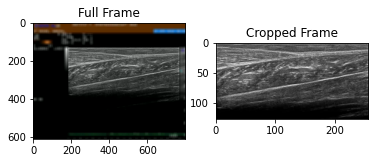

In [7]:
video_id, video = loadVideo('esaote_video.avi') # returns the video id and a list of frames
adjusted_video_frame = adjustFrame(video[0], frame, (128, 256)) # crops to specified frame

plt.subplot(121)
plt.imshow(video[0]) # plot the first frame
plt.title('Full Frame')
plt.subplot(122)
plt.imshow(adjusted_video_frame, cmap='gray') # plot the adjusted frame
plt.title('Cropped Frame')
plt.show()

Alternatively we can also use one of the predefined frames. Note that all images are processed at 256x128 pixels. The aspect ratio of the specified frame should be the same (2:1).
```
Frame.ESAOTE = (185, 128, 580, 290)
Frame.TELEMED = (88, 120, 446, 223)
Frame.AIXPLORER = (200, 261, 1000, 500)
```

Now we can track the MTJ in our video.

In [14]:
result_df = track_videos(['esaote_video.avi'], Frame.ESAOTE)
result_df

Loading videos: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
/usr/local/lib/python3.7/dist-packages/mtj_tracking/predict/predict.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(data_generator, verbose=1)


7/7 [==============================] - 69s 10s/step


file  frame_num           x          y
0   esaote_video.avi          0  132.622627  21.284020
1   esaote_video.avi          1  132.943088  21.317038
2   esaote_video.avi          2  132.699947  21.295862
3   esaote_video.avi          3  132.745020  21.293398
4   esaote_video.avi          4  132.663207  21.327379
..               ...        ...         ...        ...
64  esaote_video.avi         64   75.358708  30.096929
65  esaote_video.avi         65   75.772751  29.741681
66  esaote_video.avi         66   77.085673  30.262343
67  esaote_video.avi         67   78.540594  30.206969
68  esaote_video.avi         68   78.771053  30.220423

[69 rows x 4 columns]

Let us check the result of the model by plotting the predicted MTJ position.

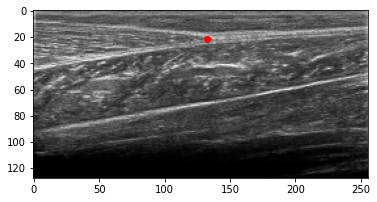

In [15]:
plt.imshow(adjusted_video_frame, cmap='gray') # plot the adjusted frame
plt.scatter(result_df.x[0], result_df.y[0], color='red')
plt.show()

The same check can be performed for the full video sequence.

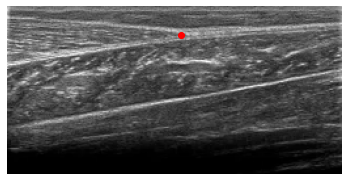

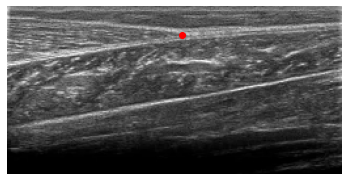

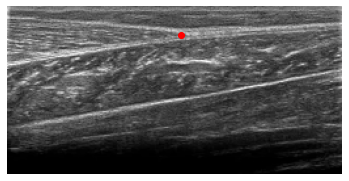

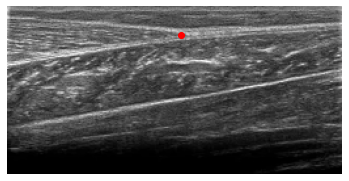

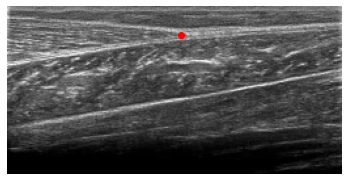

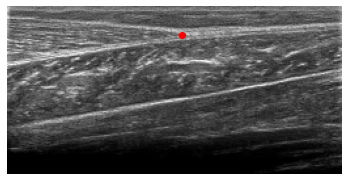

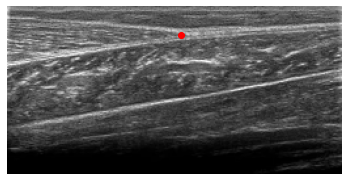

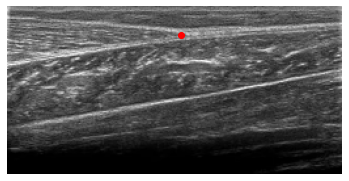

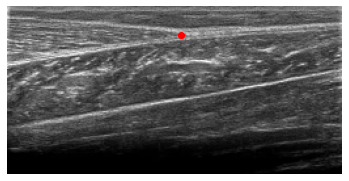

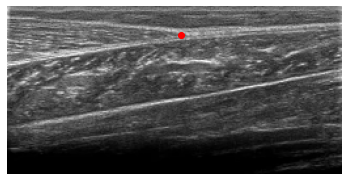

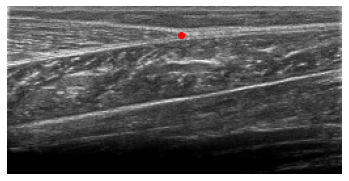

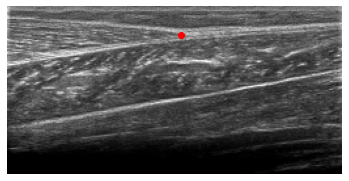

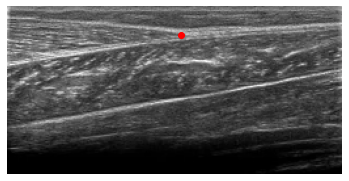

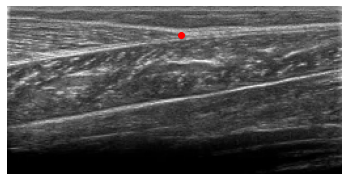

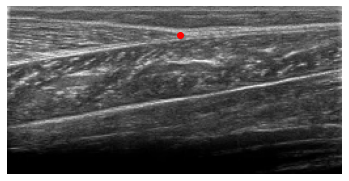

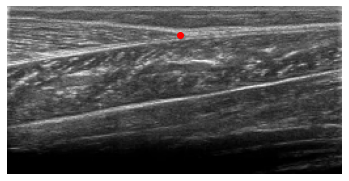

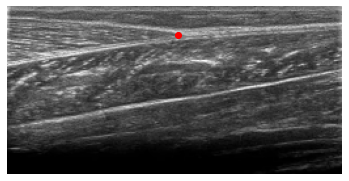

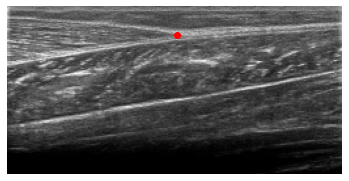

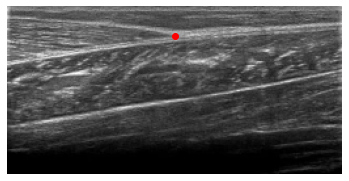

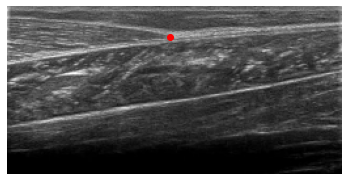

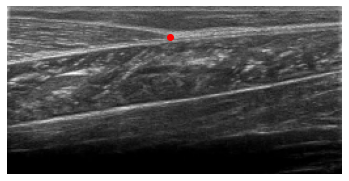

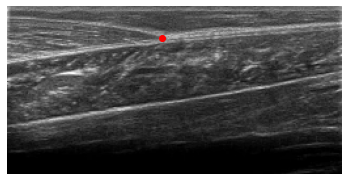

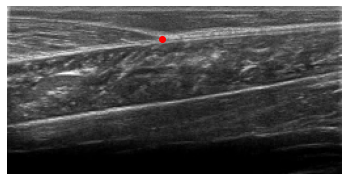

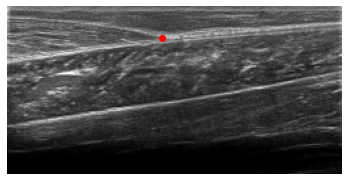

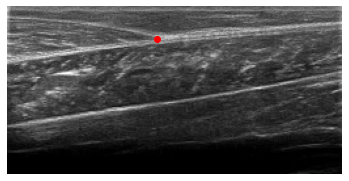

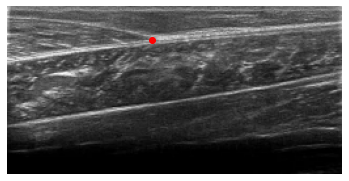

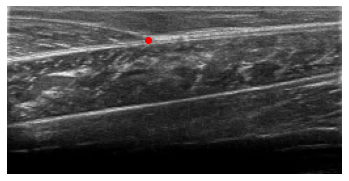

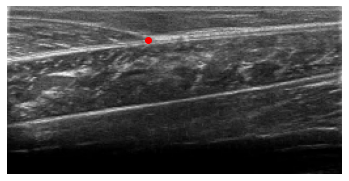

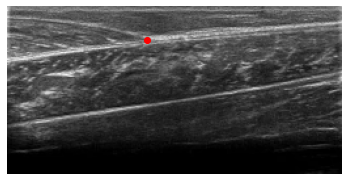

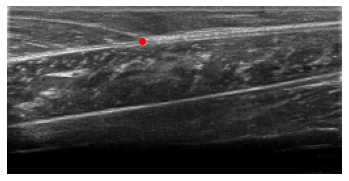

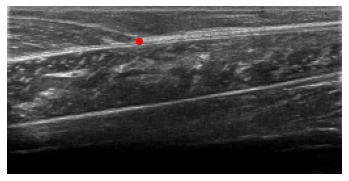

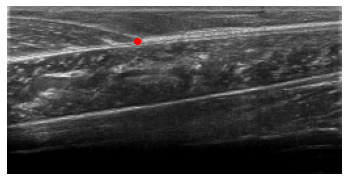

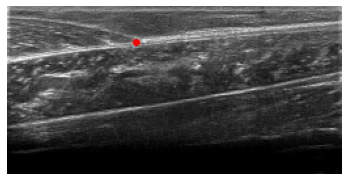

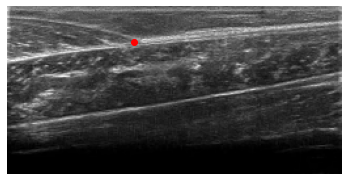

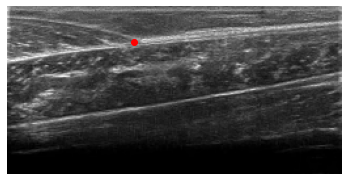

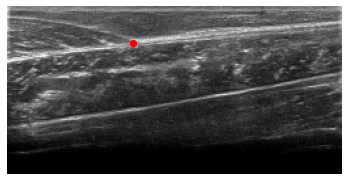

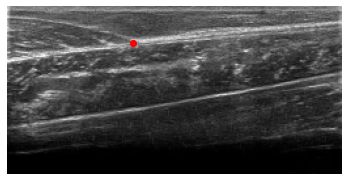

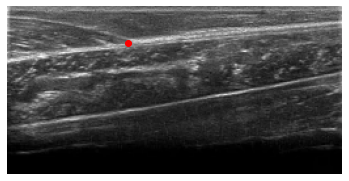

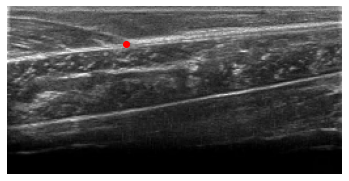

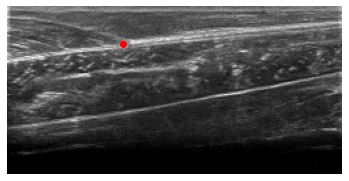

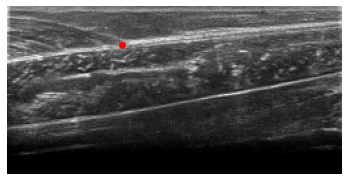

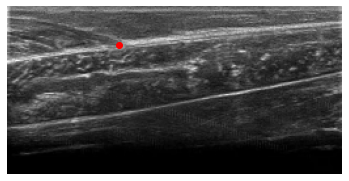

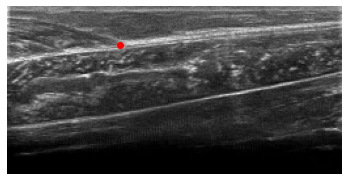

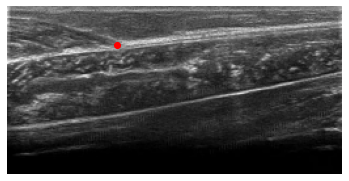

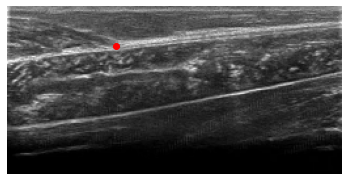

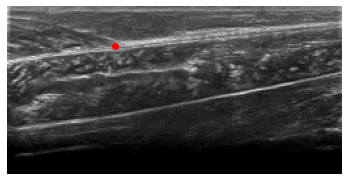

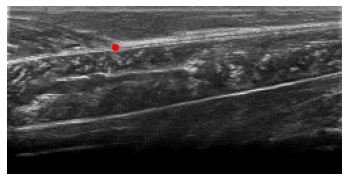

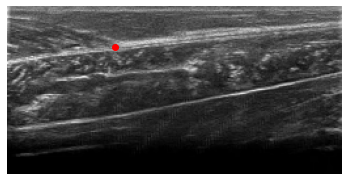

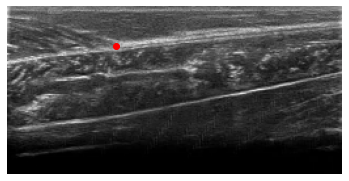

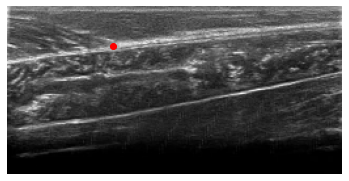

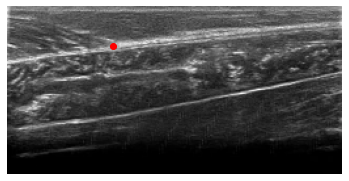

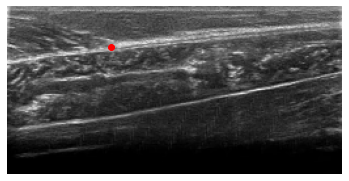

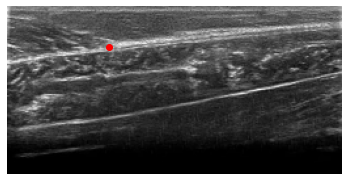

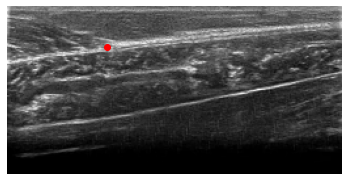

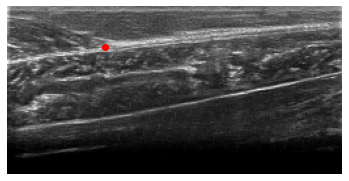

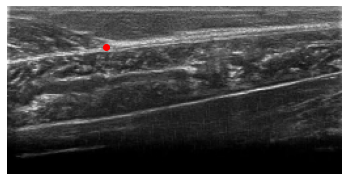

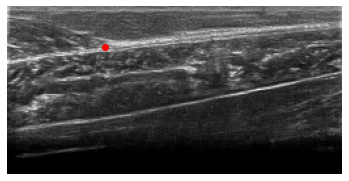

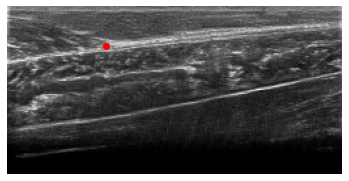

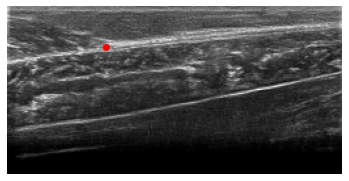

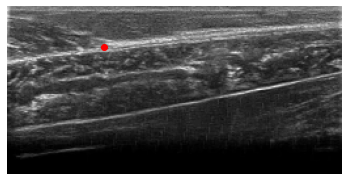

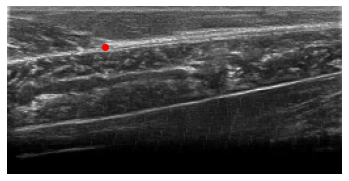

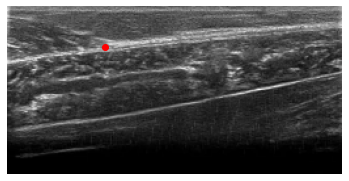

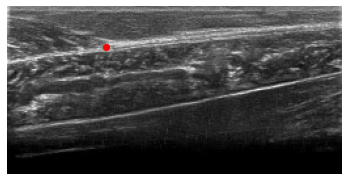

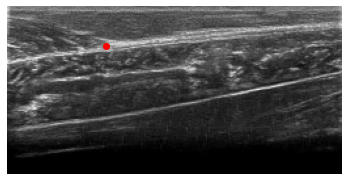

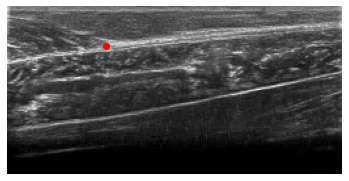

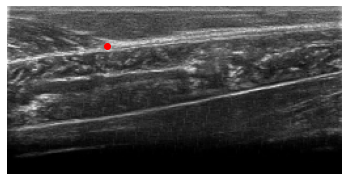

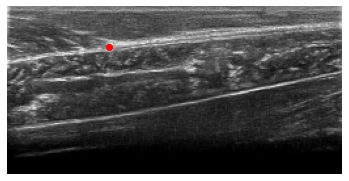

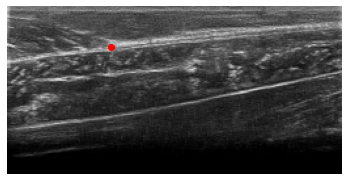

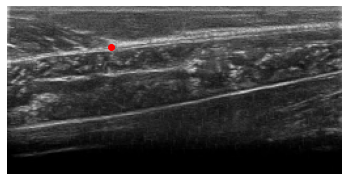

In [16]:
for i in range(len(video)):
    last_video_frame = adjustFrame(video[i], frame, (128, 256)) # crops to specified frame
    plt.imshow(last_video_frame, cmap='gray') # plot the adjusted frame
    plt.axis('off')
    plt.scatter(result_df.x[i], result_df.y[i], color='red')
    plt.show()

The result can be also converted to the pixel coordinates of the original video.

In [17]:
result_oc_df = track_videos(['esaote_video.avi'], Frame.ESAOTE, frame_coordinates=False)
result_oc_df

Loading videos: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
/usr/local/lib/python3.7/dist-packages/mtj_tracking/predict/predict.py:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(data_generator, verbose=1)


7/7 [==============================] - 70s 10s/step


file  frame_num           x           y
0   esaote_video.avi          0  485.473140  176.221607
1   esaote_video.avi          1  486.199184  176.296415
2   esaote_video.avi          2  485.648317  176.248438
3   esaote_video.avi          3  485.750435  176.242855
4   esaote_video.avi          4  485.565077  176.319844
..               ...        ...         ...         ...
64  esaote_video.avi         64  355.734573  196.188354
65  esaote_video.avi         65  356.672640  195.383497
66  esaote_video.avi         66  359.647227  196.563120
67  esaote_video.avi         67  362.943533  196.437664
68  esaote_video.avi         68  363.465667  196.468145

[69 rows x 4 columns]

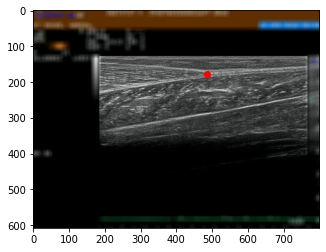

In [18]:
plt.imshow(video[0]) # plot the original frame
plt.scatter(result_oc_df.x[0], result_oc_df.y[0], color='red')
plt.show()

The list contains the pixel coordinates for each frame of the specified videos.

You can upload your own videos and convert them using the computational resources from Colab. If you have to process more data you can activate a GPU environment. For this select Runtime --> Change runtime type --> Hardware acceleration --> GPU

To convert your own files, upload your videos and specify the list of video files in the `track_video` function.
The result can be afterwards saved as a CSV file and downloaded.

In [ ]:
result_df = track_videos(['<<your-video-1>>', '<<your-video-2>>'], Frame.ESAOTE)
result_df.to_csv('deep_mtj.csv')